In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import spacy
from IPython.display import display

from src.pipelinelib.querying import Parser, Queryable

folder = os.path.join(os.getcwd(), "data", "transcripts")
files = [os.path.join(root, f) for root, _, files in os.walk(folder)
         for f in files if f.endswith(".docx")]


nlp = spacy.load("de_core_news_sm", disable=["ner", "parser"])
parser = Parser(
    nlp=nlp, metadata_path="./data/transcripts/Kopie von Transkriptionspaare_Daten.xls")

parser.read_from_files(files)
display(parser.frame)


=== Parser: reading from /home/rise/Schreibtisch/Sigmund_git/sigmund/data/transcripts/Paar 81_T1_IM_FW.docx ===
=== Parser: reading from /home/rise/Schreibtisch/Sigmund_git/sigmund/data/transcripts/Paar 87_T1_IM_FW.docx ===
=== Parser: reading from /home/rise/Schreibtisch/Sigmund_git/sigmund/data/transcripts/Paar 182_T1_IM_FW.docx ===
=== Parser: reading from /home/rise/Schreibtisch/Sigmund_git/sigmund/data/transcripts/Paar 138_T1_IM_FW.docx ===
=== Parser: reading from /home/rise/Schreibtisch/Sigmund_git/sigmund/data/transcripts/Paar 47_T1_IM_FW.docx ===
=== Parser: reading from /home/rise/Schreibtisch/Sigmund_git/sigmund/data/transcripts/Paar 105_T1_IM_FW.docx ===
=== Parser: reading from /home/rise/Schreibtisch/Sigmund_git/sigmund/data/transcripts/Paar 29_T1_IM_FW.docx ===
=== Parser: reading from /home/rise/Schreibtisch/Sigmund_git/sigmund/data/transcripts/Paar 27_T1_IM_FW.docx ===
=== Parser: reading from /home/rise/Schreibtisch/Sigmund_git/sigmund/data/transcripts/Paar 58_T1_IM_F

,document_id,paragraph_id,sentence_id,couple_id,speaker,gender,is_depressed_group,depressed_person,text
0,0,0,0,81,A,W,False,None,Ich dachte wir reden darüber wie wir die erste...
1,0,1,1,81,B,M,False,None,Erste Wohnung?
2,0,2,2,81,A,W,False,None,"Ja, ich dachte das ist ein nettes Thema, oder?"
3,0,3,3,81,B,M,False,None,Ja.
4,0,4,4,81,A,W,False,None,"Ich fand das süß, wie du erst angefangen hast ..."
...,...,...,...,...,...,...,...,...,...
126,9,94,126,60,B,M,True,W,Hab ich ein Schild auf dem Rücken?
127,9,94,127,60,B,M,True,W,Ladet eure Probleme bei mir ab.
128,9,95,128,60,A,W,True,W,Das sind keine Probleme.
129,9,96,129,60,B,M,True,W,Kümmerst du dich drum.


In [3]:
from src.pipelinelib.querying import Parser, Queryable
from src.pipelinelib.text_body import TextBody
from src.pipelinelib.pipeline import Pipeline
queryable = Queryable.from_parser(parser)

In [5]:
#from src.sigmund import adapter
from src.sigmund.extensions import *
from src.sigmund.preprocessing.words import Tokenizer, Stemmer, Lemmatizer
from src.sigmund.features import agreement_score as fagree
from src.sigmund.features import flesch_reading_ease as fflesch
from src.sigmund.features import talk_turn as ftalkturn
from src.sigmund.features import liwc as fliwc
from src.sigmund.features import pos as fpos
from src.sigmund.features import tfidf as ftfidf
from src.sigmund.preprocessing import words as pwords
from src.sigmund.classification import merger
liwc_dict_path = r"/home/rise/Schreibtisch/Sigmund_git/sigmund/data/German_LIWC2001_Dictionary.dic"

pipeline = Pipeline(queryable = queryable, empty_pipeline=True) 
pipeline.add_component(pwords.Tokenizer())
#pipeline.add_component(fliwc.Liwc(white_list = ['Death', 'Metaph']))
pipeline.add_component(fpos.PartOfSpeech(white_list = ['NN']))
#pipeline.add_component(Stemmer())
#pipeline.add_component(Lemmatizer())
#pipeline.add_component(ftfidf.FeatureTFIDF(white_list = ['ja']))
#pipeline.add_component(fflesch.FleschExtractor())
#pipeline.add_component(ftalkturn.TalkTurnExtractor())
#pipeline.add_component(fagree.AgreementScoreExtractor())
#pipeline.add_component(merger.FeatureMerger())
#pipeline.add_component(fliwc.Liwc_Inverse(category = ['Death']))
    
#.add_component(adapter.Adapter(old = TOKENS_sese, new = TALKTURN))\


=== Starting pipeline with ['Tokenizer', 'PartOfSpeech'] ===
Executing Tokenizer
Executing PartOfSpeech
=== Finished pipeline execution ===


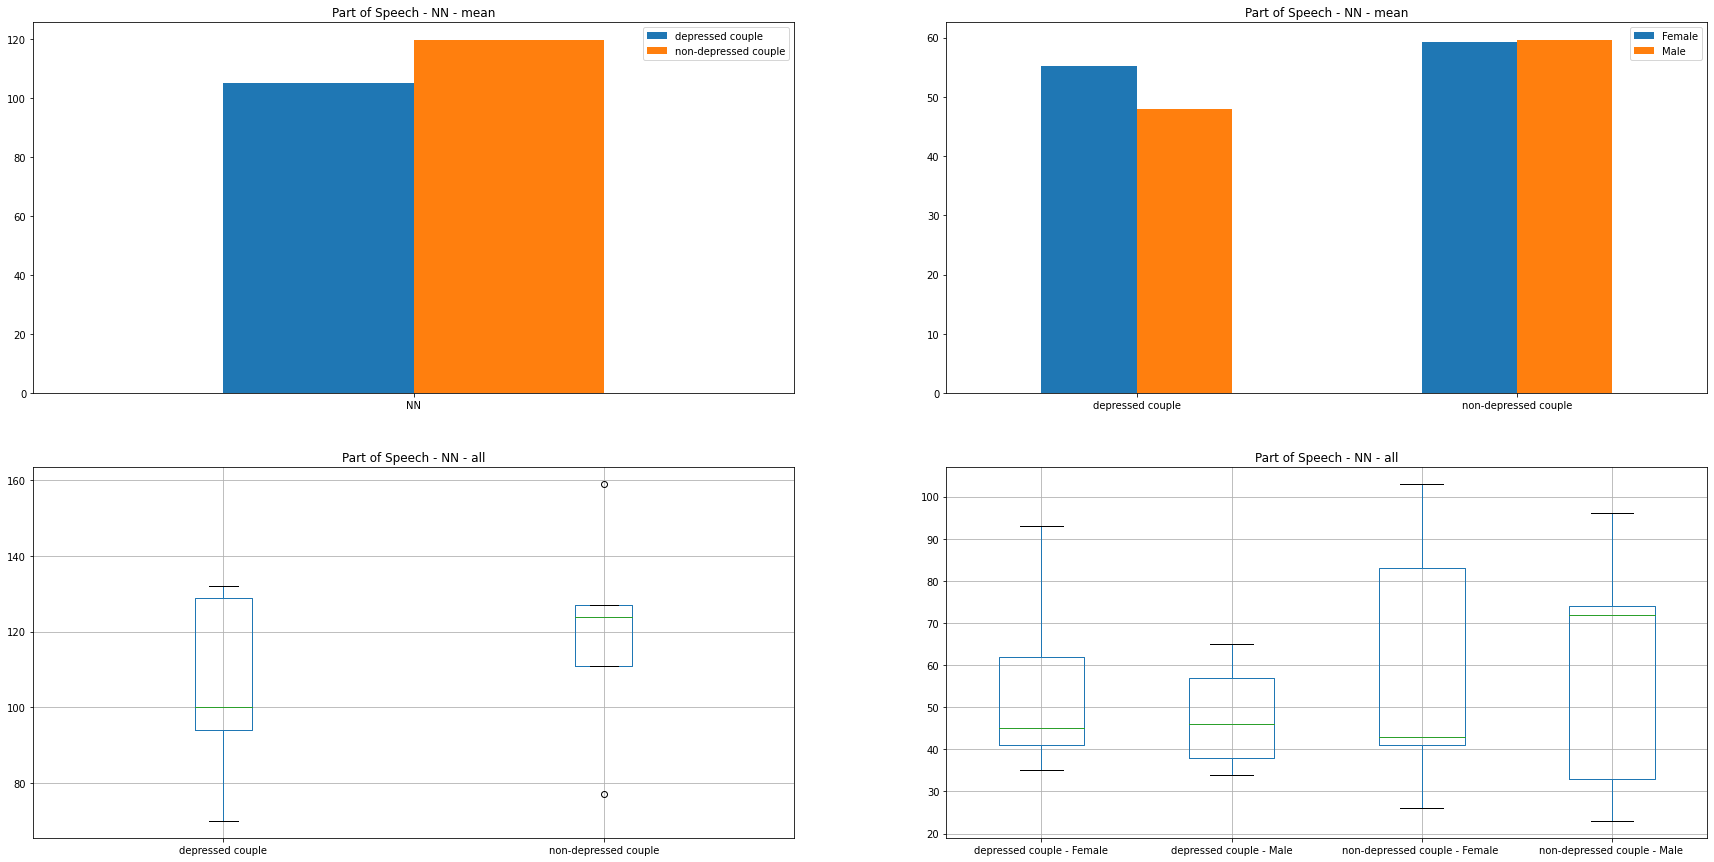

In [6]:
test = pipeline.execute(visualise = True)

In [155]:
display(test)

{tokens_sentence(preprocessing):      couple_id speaker gender  is_depressed_group  document_id  paragraph_id  \
 0           81       A      W               False            0             0   
 1           81       B      M               False            0             1   
 2           81       A      W               False            0             2   
 3           81       B      M               False            0             3   
 4           81       A      W               False            0             4   
 ..         ...     ...    ...                 ...          ...           ...   
 126         60       B      M                True            9            94   
 127         60       B      M                True            9            94   
 128         60       A      W                True            9            95   
 129         60       B      M                True            9            96   
 130         60       B      M                True            9            96

In [ ]:
document_df = queryable.execute(level=TextBody.DOCUMENT)
display(document_df)

In [ ]:
paragraph_df = queryable.execute(level=TextBody.PARAGRAPH)
display(paragraph_df)

In [ ]:
sentence_df = queryable.execute(level=TextBody.SENTENCE)
display(sentence_df)

queryable.execute(level=TextBody.SENTENCE)

In [ ]:
pgs = queryable.by_couple_id(couple_id=27) \
    .is_depressed(d=False) \
    .execute(level=TextBody.DOCUMENT)
display(pgs)